In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import cv2 as cv

## Sampling 

.Convert a Continous signal into a Discrete Signal
. sampling refers to the process of converting a continuous image into a discrete form by selecting pixels at specific intervals from the continuous spatial domain

## Down Sampling
##### It the technique in Which we reduce the resolution of an image.

In [246]:
img = cv.imread("C:\\Users\PMLS\Desktop\Images For DIP\DIP3E_CH02_Original_Images\DIP3E_Original_Images_CH02\Fig0220(a)(chronometer 3692x2812  2pt25 inch 1250 dpi).tif",0)


In [248]:
img.shape


(3692, 2812)

In [250]:
img_1 = img[::2 , ::2]
img_2 = img_1[::2 , ::2]
img_3 = img_2[::2 , ::2]
img_4 = img_3[::2 , ::2]
img_5 = img_4[::2 , ::2]
img_6 = img_5[::2 , ::2]
print(img_1.shape ,img_2.shape,img_3.shape,img_4.shape,img_5.shape,img_6.shape )

(1846, 1406) (923, 703) (462, 352) (231, 176) (116, 88) (58, 44)


Text(0.5, 1.0, '58 X 44')

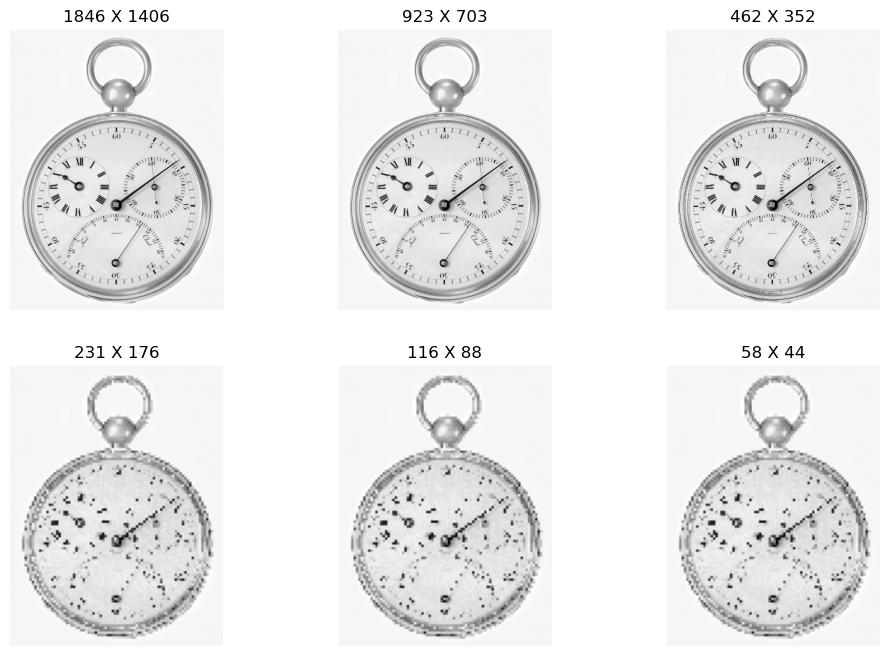

In [252]:
fig ,ax = plt.subplots(2,3 , figsize = (12,8))
ax[0,0].imshow(img_1, 'gray')
ax[0,0].axis("off")
ax[0,0].set_title("1846 X 1406")
ax[0,1].imshow(img_2, 'gray')
ax[0,1].axis("off")
ax[0,1].set_title("923 X 703")
ax[0,2].imshow(img_3, 'gray')
ax[0,2].axis("off")
ax[0,2].set_title("462 X 352")
ax[1,0].imshow(img_4, 'gray')
ax[1,0].axis("off")
ax[1,0].set_title("231 X 176")
ax[1,0].imshow(img_5, 'gray')
ax[1,0].axis("off")
ax[1,0].set_title("231 X 176")
ax[1,1].imshow(img_5, 'gray')
ax[1,1].axis("off")
ax[1,1].set_title("116 X 88")
ax[1,2].imshow(img_5, 'gray')
ax[1,2].axis("off")
ax[1,2].set_title("58 X 44")


## Up Sampling

In [255]:
img_1_us = np.zeros((img_1.shape[0]*2, img_1.shape[1]*2) ,dtype = np.uint8)
img_1_us[::2 , ::2] = img_1
img_1_us[0::2 , 1::2] = img_1
img_1_us[1::2 , 0::2] = img_1
img_1_us[1::2 , 1::2] = img_1

(3692, 2812)


Text(0.5, 1.0, '(3692, 2812)')

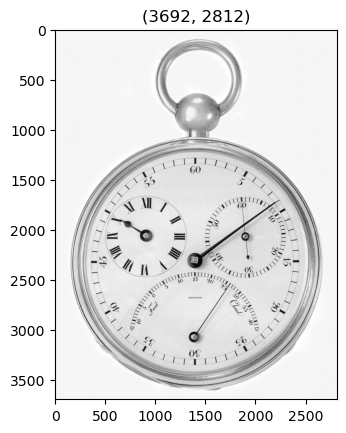

In [257]:
print(img_1_us.shape)
plt.imshow(img_1_us,cmap='gray')
plt.title(img_1_us.shape)

In [258]:
img_2_us = np.zeros((img_2.shape[0]*4, img_2.shape[1]*4) ,dtype = np.uint8)
for i in range(4):
    for j in range(4):
        img_2_us[i::4 , j::4] = img_2

img_2_us.shape

(3692, 2812)

In [260]:
img_3_us = np.zeros((img_3.shape[0]*8, img_3.shape[1]*8) ,dtype = np.uint8)
for i in range(8):
    for j in range(8):
        img_3_us[i::8,j::8] = img_3
img_2_us.shape

(3692, 2812)

In [263]:
img_4_us = np.zeros((img_4.shape[0]*16, img_4.shape[1]*16) ,dtype = np.uint8)
for i in range(16):
    for j in range(16):
        img_4_us[i::16 , j::16] = img_4

img_2_us.shape

(3692, 2812)

(-0.5, 2815.5, 3695.5, -0.5)

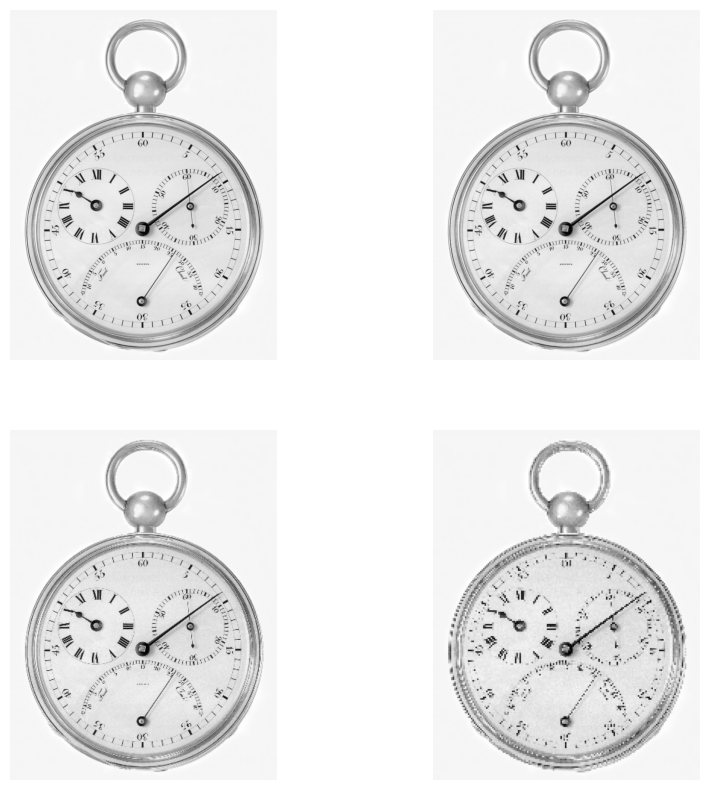

In [265]:
fig ,ax = plt.subplots(2,2 , figsize = (10,10))
ax[0,0].imshow(img_1_us,'gray')
ax[0,0].axis('off')
ax[0,1].imshow(img_2_us,'gray')
ax[0,1].axis('off')
ax[1,0].imshow(img_3_us,'gray')
ax[1,0].axis('off')
ax[1,1].imshow(img_4_us,'gray')
ax[1,1].axis('off')
# ax[0,0].imshow(img_1_us,'gray')
# ax[0,0].axis('off')

## Image interpolation

In [267]:
img_org  = cv.imread("C:\\Users\PMLS\Desktop\Images For DIP\DIP3E_CH02_Original_Images\DIP3E_Original_Images_CH02\Fig0222(a)(face).tif",0)
img_org

array([[ 23,  21,  17, ..., 119, 121, 115],
       [ 25,  35,  51, ..., 117, 116, 119],
       [ 32,  42,  66, ..., 118, 116, 126],
       ...,
       [ 54,  62,  68, ...,  40,  45,  51],
       [ 54,  69,  69, ...,  40,  44,  49],
       [ 49,  65,  59, ...,  42,  46,  51]], dtype=uint8)

In [270]:
img_org_r =img_org.shape[0]
img_org_c =img_org.shape[1]
img_org_r

300

## Nearest Neighbor `

In [273]:
img_R = np.zeros((1200,1200,),dtype = np.uint8)
img_rows = img_R.shape[0]
img_col = img_R.shape[1]

In [275]:
Scale_row  = (img_org_r) /(img_rows)
Scale_col = (img_org_c )/(img_col)

In [277]:
for i in range(img_R.shape[0]):
    for j in range(img_R.shape[1]):
        r = i * Scale_row
        c = j * Scale_col
        r = int(np.round(r))
        c = int(np.round(c))
        r = min(max(r, 0), img_org.shape[0] - 1)
        c = min(max(c, 0), img_org.shape[1] - 1)
        img_R[i,j] = img_org[r,c]

In [279]:
img_R.shape

(1200, 1200)

(-0.5, 299.5, 299.5, -0.5)

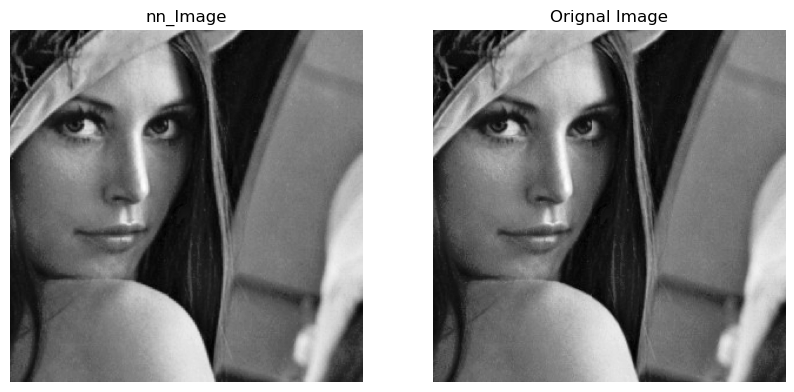

In [281]:
fig , ax = plt.subplots(1,2 , figsize = (10,5))
ax[0].imshow(img_R,'gray')
ax[0].set_title('nn_Image')
ax[0].axis('off')
ax[1].imshow(img_org , 'gray')
ax[1].set_title('Orignal Image')
ax[1].axis('off')

## BiLinear InterPolation

In [284]:
img_O  = imag=cv.imread("C:\\Users\PMLS\Desktop\Images For DIP\DIP3E_CH02_Original_Images\DIP3E_Original_Images_CH02\Fig0219(rose1024).tif",0)

In [286]:
# red_Img =imag[::7,::7]
# red_Img.shape

(147, 147)

#### Now we Can apply the Bilinear Interpolation

In [289]:
bi_Img = cv.resize(red_Img, (1024,1024) , interpolation = cv.INTER_LINEAR)
bi_Img.shape

(1024, 1024)

Text(0.5, 1.0, 'BiLinear Resizable Image')

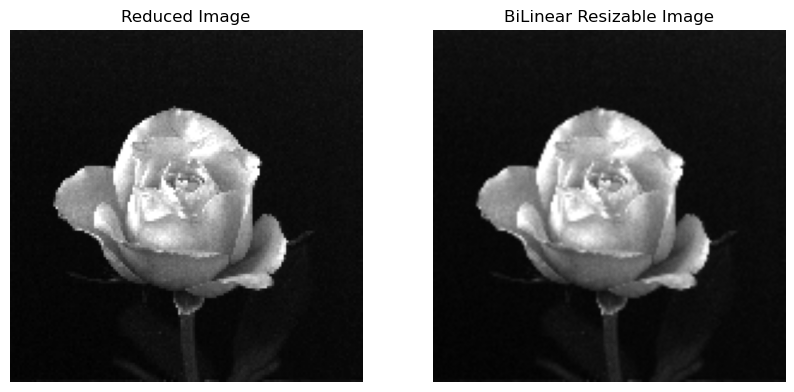

In [291]:
fig ,axs= plt.subplots(1,2, figsize=(10,5))
axs[0].imshow(red_Img,'gray')
axs[0].set_title('Reduced Image')
axs[0].axis('off')

axs[1].imshow(bi_Img , 'gray')
axs[1].axis('off')
axs[1].set_title('BiLinear Resizable Image')

### BiCUbic InterPolation

In [294]:
Cubic_Img = cv.resize(red_Img, (1024,1024) , interpolation = cv.INTER_CUBIC)
Cubic_Img.shape

(1024, 1024)

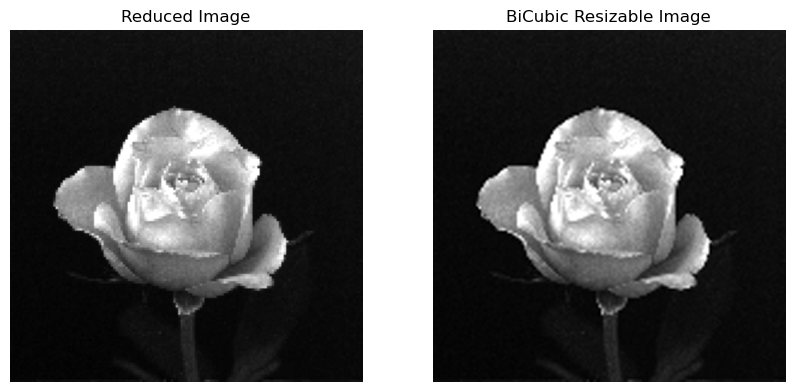

In [296]:
fig ,axs= plt.subplots(1,2, figsize=(10,5))
axs[0].imshow(red_Img,'gray')
axs[0].set_title('Reduced Image')
axs[0].axis('off')

axs[1].imshow(Cubic_Img , 'gray')
axs[1].axis('off')
axs[1].set_title('BiCubic Resizable Image')

cv.imshow("Rose", red_Img);
cv.imshow("Rose", Cubic_Img);

cv.waitKey(0);
cv.destroyAllWindows();

### Change Gray Image into Color Image

In [6]:
img_rose = cv.imread("C:\\Users\PMLS\Desktop\Images For DIP\DIP3E_CH02_Original_Images\DIP3E_Original_Images_CH02\Fig0219(rose1024).tif",0)

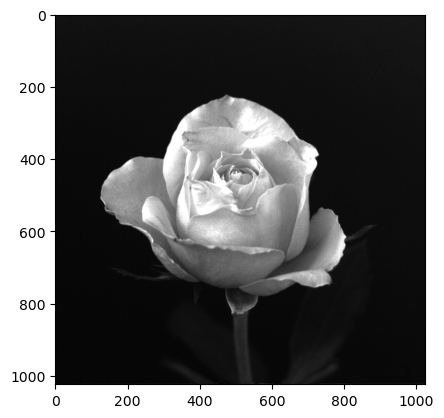

In [8]:
plt.imshow(img_rose, 'gray')

In [12]:
img_red  = np.zeros( (img_rose.shape[0] , img_rose.shape[1], 3), dtype = 'B') 

In [304]:
img_red[:,: ,0 ] = img_rose

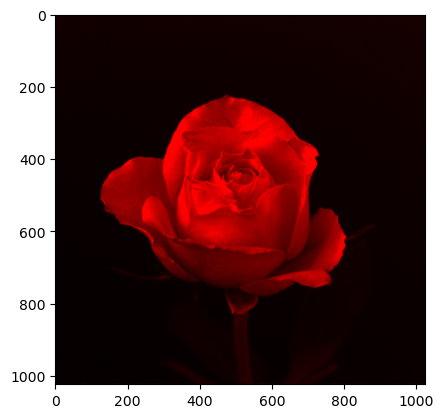

In [306]:
plt.imshow(img_red)

In [308]:
red = img_red[:,:,0]
red

array([[21, 17, 15, ..., 23, 23, 23],
       [20, 19, 17, ..., 23, 23, 23],
       [17, 17, 20, ..., 24, 23, 23],
       ...,
       [ 7,  7,  7, ..., 21, 21, 21],
       [10, 10, 10, ..., 17, 17, 17],
       [10, 10, 10, ..., 15, 15, 15]], dtype=uint8)

In [310]:
red[red<53] = 0
red

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

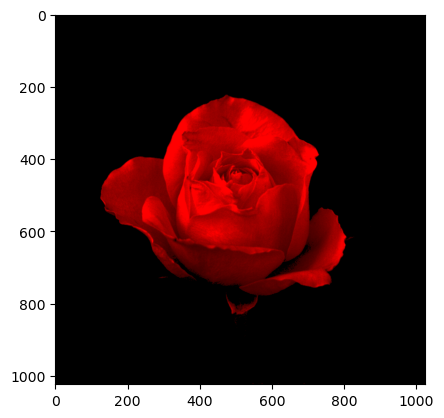

In [312]:
img_red[:,:,0] = red
plt.imshow(img_red)

In [314]:
green  = img_rose

In [316]:
img_red[:,:,1] = green

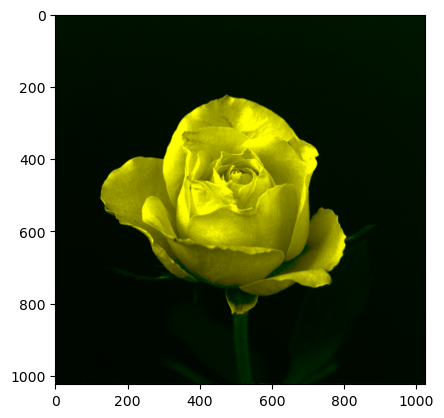

In [318]:
plt.imshow(img_red)

In [320]:
green[red!=0 ] = 0
img_red[:,:,1] = green

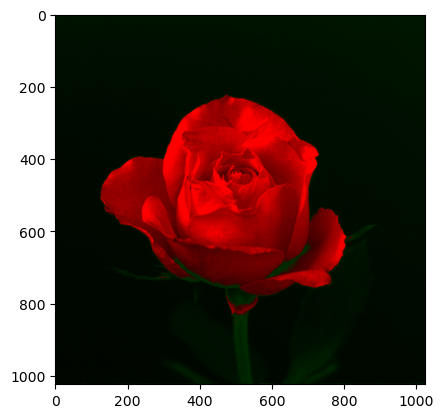

In [322]:
plt.imshow(img_red,'gray')